In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.DataFrame(columns = ['X','Y','class'], data=[[0.787,0.577,1],[-0.678, 0.568,0],[0.244, 0.126,1],[0.617,0.977,1],[-0.187,0.311,0]])

In [13]:
df

,X,Y,class
0,0.787,0.577,1
1,-0.678,0.568,0
2,0.244,0.126,1
3,0.617,0.977,1
4,-0.187,0.311,0


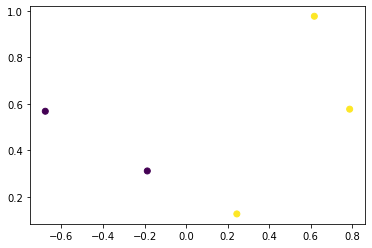

In [16]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [19]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [20]:
X

array([[ 0.787,  0.577],
       [-0.678,  0.568],
       [ 0.244,  0.126],
       [ 0.617,  0.977],
       [-0.187,  0.311]])

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

In [24]:
model.add(Dense(2,activation='tanh', input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.get_weights()

[array([[-0.58580905, -0.51377916],
        [ 0.7072506 ,  1.069075  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.70840025, 1.0847181 ],
        [0.8473321 , 1.186221  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.12459922,  0.0129118 ],
        [-0.6117175 ,  1.0887805 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.67801154, 1.0812887 ],
        [1.2171208 , 0.44180155]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2348051],
        [-1.3050208]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
initial_weights = model.get_weights()

In [35]:
# Weight Initialization with small Random values
initial_weights[0]= np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [36]:
initial_weights

[array([[-0.00142761,  0.00086498],
        [ 0.01333371,  0.02042427]]),
 array([0., 0.]),
 array([[-0.02044843, -0.00635365],
        [-0.00082927,  0.00750701]]),
 array([0., 0.]),
 array([[ 0.01410603, -0.00169039],
        [ 0.00357612, -0.01005729]]),
 array([0., 0.]),
 array([[-0.00245041,  0.02595435],
        [ 0.00439637, -0.00992945]]),
 array([0., 0.]),
 array([[-0.01329237],
        [-0.00856384]]),
 array([0.])]

In [37]:
model.set_weights(initial_weights)

In [39]:
model.get_weights()

[array([[-0.00142761,  0.00086498],
        [ 0.01333371,  0.02042427]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.02044843, -0.00635365],
        [-0.00082927,  0.00750701]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01410603, -0.00169039],
        [ 0.00357612, -0.01005729]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00245041,  0.02595435],
        [ 0.00439637, -0.00992945]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01329237],
        [-0.00856384]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
dl_model = model.fit(X,y,epochs=100, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.2500 - val_loss: 0.6937 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6929 - accuracy: 0.7500 - val_loss: 0.6942 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6926 - accuracy: 0.7500 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6924 - accuracy: 0.7500 - val_loss: 0.6952 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6921 - accuracy: 0.7500 - val_loss: 0.6957 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 0.6919 - accuracy: 0.7500 - val_loss: 0.6962 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6916 - accuracy: 0.7500 - val_loss: 0.6968 - val_accuracy: 0.000

In [42]:
model.get_weights()

[array([[0.11867218, 0.09816586],
        [0.12495474, 0.11302205]], dtype=float32),
 array([0.11805039, 0.09620406], dtype=float32),
 array([[-0.13453332, -0.1190122 ],
        [-0.10823987, -0.09804473]], dtype=float32),
 array([-0.14526704, -0.1417644 ], dtype=float32),
 array([[ 0.15234585, -0.13745612],
        [ 0.13956097, -0.1438963 ]], dtype=float32),
 array([-0.14757873,  0.14723703], dtype=float32),
 array([[ 0.14434236,  0.17264384],
        [-0.14229558, -0.15645021]], dtype=float32),
 array([-0.1306767 , -0.13296726], dtype=float32),
 array([[-0.15043744],
        [-0.14580493]], dtype=float32),
 array([0.09752344], dtype=float32)]